In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "nyt-comments"

1. keras :- to get the keras backend which is similar to python - model fitting. **text_tokenizer**
2. tm :- A framework for text mining applications within R. **removeWords** - to remove unwanted words from the data, **removeNumbers** - Remove Numbers from a Text Document, **stopwords**, **stripWhitespace**, **removePunctuation**
3. textstem :- lemmatization and stemming. **lemmatize_strings**
4. rlist :- to append elements to a list - **list.append**
5. qdap :-  Quantitative Discourse Analysis Package is an R package designed to assist in quantitative discourse analysis. The package stands as a bridge between qualitative transcripts of dialogue and statistical analysis & visualization.  **bracketX** - (hello) -> hello, **replace_abbreviation** - sr. -> senior, **replace_contraction** - he'd -> he would, **replace_symbol** - $ -> dollar
6. wordcloud :- normal **wordcloud**

In [2]:
library(keras) 
library(tm) 
library(textstem)

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


The following object is masked from ‘package:httr’:

    content


Loading required package: koRpus.lang.en

Loading required package: koRpus

Loading required package: sylly

For information on available language packages for 'koRpus', run

  available.koRpus.lang()

and see ?install.koRpus.lang()



Attaching package: ‘koRpus’


The following object is masked from ‘package:readr’:

    tokenize




In [3]:
library(rlist) 

In [4]:
install.packages("qdap", INSTALL_opts = "--no-multiarch")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘openNLPdata’, ‘rJava’, ‘xlsxjars’, ‘gender’, ‘openNLP’, ‘venneuler’, ‘xlsx’




In [5]:
library(qdap)

Loading required package: qdapDictionaries

Loading required package: qdapRegex


Attaching package: ‘qdapRegex’


The following object is masked from ‘package:dplyr’:

    explain


The following object is masked from ‘package:ggplot2’:

    %+%


Loading required package: qdapTools


Attaching package: ‘qdapTools’


The following object is masked from ‘package:dplyr’:

    id


Loading required package: RColorBrewer

Registered S3 methods overwritten by 'qdap':
  method               from
  t.DocumentTermMatrix tm  
  t.TermDocumentMatrix tm  


Attaching package: ‘qdap’


The following object is masked from ‘package:textstem’:

    stem_words


The following object is masked from ‘package:koRpus’:

    SMOG


The following objects are masked from ‘package:tm’:

    as.DocumentTermMatrix, as.TermDocumentMatrix


The following object is masked from ‘package:NLP’:

    ngrams


The following object is masked from ‘package:keras’:

    %>%


The following object is masked from ‘package:

In [6]:
library(wordcloud)

In [7]:
df = read_csv("../input/nyt-comments/ArticlesJan2017.csv")

Parsed with column specification:
cols(
  articleID = col_character(),
  abstract = col_character(),
  byline = col_character(),
  documentType = col_character(),
  headline = col_character(),
  keywords = col_character(),
  multimedia = col_double(),
  newDesk = col_character(),
  printPage = col_double(),
  pubDate = col_datetime(format = ""),
  sectionName = col_character(),
  snippet = col_character(),
  source = col_character(),
  typeOfMaterial = col_character(),
  webURL = col_character(),
  articleWordCount = col_double()
)



In [8]:
headline = df['headline']

In [9]:
head(headline)

headline
<chr>
G.O.P. Leadership Poised to Topple Obama’s Pillars
Fractured World Tested the Hope of a Young President
Little Troublemakers
"Angela Merkel, Russia’s Next Target"
Boots for a Stranger on a Bus
"Molder of Navajo Youth, Where a Game Is Sacred"


In [10]:
# Data Preprocessing
cleaned_df = matrix(0, ncol = 1, nrow = dim(headline)[1])
cleaned_df = data.frame(cleaned_df)

In [11]:
cleaned_df = data.frame(headline)

In [12]:
# Removing words that have length <= 2
for(i in 1:dim(headline)[1])
{
  cleaned_df[i,1] = gsub('\\b\\w{1,2}\\b','',headline[i,1])
}

In [13]:
stopwords = stopwords("english")

In [14]:
for( i in 1:dim(cleaned_df)[1] )
{
  x = tolower(cleaned_df[i,1])
  x = removePunctuation(x)
  cleaned_df[i,1] = x
}

In [15]:
head(cleaned_df)

,headline
,<chr>
1,leadership poised topple obama’ pillars
2,fractured world tested the hope young president
3,little troublemakers
4,angela merkel russia’ next target
5,boots for stranger bus
6,molder navajo youth where game sacred


In [16]:
for( i in 1:dim(cleaned_df)[1] )
{
  x = tolower(cleaned_df[i,1])
  x = removePunctuation(x)
  x = stripWhitespace(x)
  x = removeNumbers(x)
  x = bracketX(x)
  x = replace_abbreviation(x)
  x = replace_contraction(x)
  x = replace_symbol(x)
  x = removeWords(x, stopwords)
  x = lemmatize_strings(x)
  cleaned_df[i,1] = x
}

Registered S3 methods overwritten by 'textclean':
  method           from
  print.check_text qdap
  print.sub_holder qdap



In [17]:
corpus = c()
for(i in 1:dim(cleaned_df)[1])
{
    #stop = c("the", "Unknown", "trump", "Trump")
    x = removeWords(cleaned_df[i,1], "Unknown")
    #x = cleaned_df[i,1]
    corpus = append(corpus, x, length(corpus))
}

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


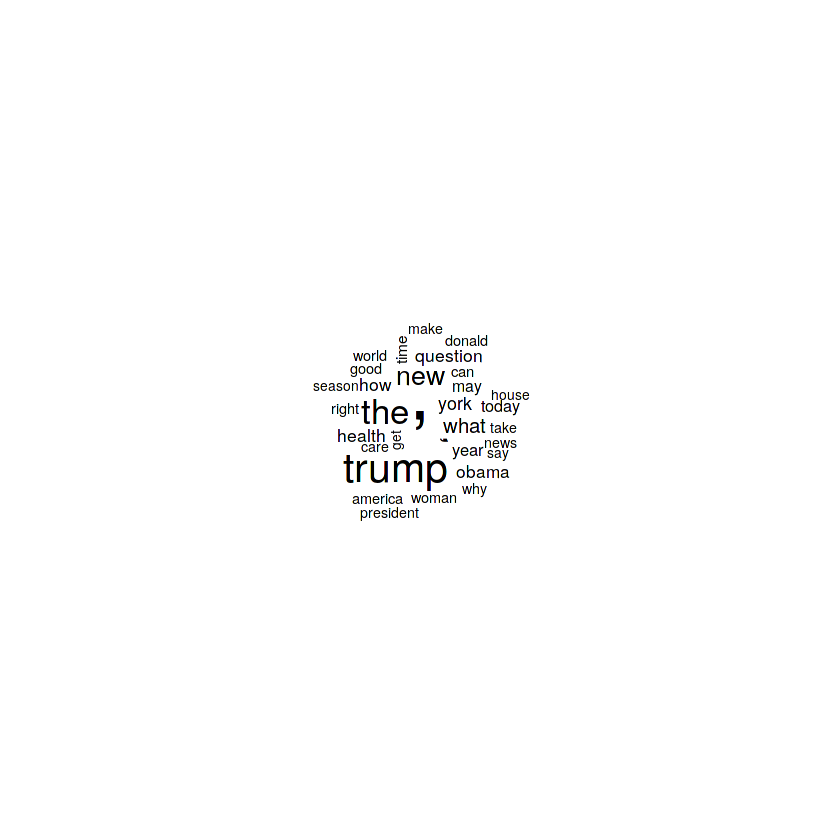

In [18]:
wordcloud(corpus, min.freq = 10,random.order = FALSE)

In [19]:
corpus[1]

[1] "Leadership poise topple obama ’ pillar"

1. text_tokenizer, fit_text_tokenizer, texts_tp_sequences all these are used to convert a word into numbers so that computer can understand
2. word_index :- this returns a dictionary mapping each word to its corresponding number given by the text_to_sequences
3. pad_sequences :- to make the all the record having same length
4. to_categorical :- one-hot encoding of the labels

In [20]:
tokenizer <- text_tokenizer(num_words = 15000) %>% 
  fit_text_tokenizer(corpus)

In [21]:
sequences <- texts_to_sequences(tokenizer, corpus)
word_index <- tokenizer$word_index

In [22]:
input = as.character(corpus)

In [23]:
len = c()
for(x in 1:length(input))
{
    len = append(len, sapply(strsplit(input[x], " "), length), length(len))
}
max_length = max(len)
len = c()

In [24]:
max_length

[1] 14

In [25]:
data = (pad_sequences(sequences, maxlen = max_length, padding = "pre"))

In [26]:
dim(data)

[1] 850  14

In [27]:
features = data.matrix(data[,-dim(data)[2]])

In [28]:
labels = data.matrix(data[,dim(data)[2]])

In [29]:
total_words = length(word_index) + 1

In [30]:
labels = to_categorical(labels, num_classes = total_words)

In [31]:
model = keras_model_sequential() %>%
        layer_embedding(total_words, 10, input_length = max_length - 1, name = "embedding") %>%
        layer_lstm(100, name = "lstm") %>%
        layer_dropout(0.1, name = "dropout") %>%
        layer_dense(total_words, activation = "softmax", name = "dense")

In [32]:
# Compile

model %>% compile(
  optimizer = optimizer_adam(),
  loss = "categorical_crossentropy"
)

In [33]:
model %>% fit(features, labels, epochs = 50, verbose = 0)

In [34]:
model

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
embedding (Embedding)               (None, 13, 10)                  17860       
________________________________________________________________________________
lstm (LSTM)                         (None, 100)                     44400       
________________________________________________________________________________
dropout (Dropout)                   (None, 100)                     0           
________________________________________________________________________________
dense (Dense)                       (None, 1786)                    180386      
Total params: 242,646
Trainable params: 242,646
Non-trainable params: 0
________________________________________________________________________________



In [35]:
generate_text = function(seed_text, next_words, model, max_seq_len)
{
    for(i in 1:(next_words))
    {
        tokenizer = text_tokenizer(num_words = 15000) %>% 
                    fit_text_tokenizer(corpus)
        token_list = texts_to_sequences(tokenizer, seed_text)
        
        word_index = tokenizer$word_index
        words = as.data.frame(word_index)
        
        token_list = pad_sequences(token_list, maxlen=max_seq_len-1, padding='pre')
        predicted = predict_classes(model, list(token_list), verbose = 0)
        print(predicted)
        output_word = ""
        for(index in 1:dim(words)[2])
        {
            if(words[index] == predicted)
            {
                output_word = list(colnames(words[index]))
                break
            }
        }  
        seed_text = list(paste(seed_text, output_word, sep = " "))
    }
    return(seed_text)
}

In [36]:
seed_text = list("leadership poise topple")

In [37]:
print(generate_text(seed_text, 5, model, max_length))

[1] 852
[1] 260
[1] 40
[1] 40
[1] 1
[[1]]
[1] "leadership poise topple brain food plan plan X..1"

